In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [ ]:
df =

# CIS 5200 Project EDA - Original Train Dataset

On the binary classification straight from kaggle. Pure experimentation. done by garrett

Overview of Notebook:
- Basic table loading checks (size, missing values)
- Target class balance
- Missing values
- Delay rates by airlines (CARRIER_NAME)
- Delay rate by departure time block (DEP_TIME_BLK)
- Delay Rate by Airport (DEPARTING_AIRPORT)
- Numerical correlations with target
- Weather feature relationships
- Continuous multicollinearity analysis


Takeaways:
- The historical context features are the strongest predictors, encode systematic patterns
- These include: (DEP_BLOCK_HIST historical delay frequency, CARRIER_HISTORICAL airlines historical delay rate, SEGMENT_NUMBER position in itinerary, DEP_AIRPORT_HIST airport historical delay rate, DAY_HISTORICAL day of month historic congestoon)
- Weather effects are real, but mild (PRCP, AWND, SNOW/SNWD)
- This will matter more prob in non linear models
- Operational and physical characteristics (distance group, num seats, plane age, concurrent flights) have minimal linear impact, but these could still matter in an interaction

Ideas:
- Interaction features for weak predictors. What if congestion matters only at peak hours?
- The strong multicollinear relationships between airport flights per month with avg monthly passengers, airlines, and concurrent flights demonstrates that airport congestion is a general factor that impacts our model. Instead of many redundant features use PCA or other dim reduction??

In [ ]:
path = ""
all_files = glob.glob(path + "*.csv")

# Read and concatenate all CSVs
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# Check the result
print(df.shape)
print(df.head())

# df = pd.read_csv('ONTIME_REPORTING_01.csv')
df.head()

(7422037, 33)
   MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM  \
0      4             5            5                NK   N646NK   
1      4             6            6                NK   N615NK   
2      4             7            7                NK   N633NK   
3      4             8            1                NK   N655NK   
4      4             9            2                NK   N605NK   

   OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN ORIGIN_CITY_NAME  \
0                779              12953    LGA     New York, NY   
1                779              12953    LGA     New York, NY   
2                779              12953    LGA     New York, NY   
3                779              12953    LGA     New York, NY   
4                779              12953    LGA     New York, NY   

   DEST_AIRPORT_ID  ... CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME  DISTANCE  \
0            11697  ...            188.0               181.0    1076.0   
1            11697  ...            188

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,4,5,5,NK,N646NK,779,12953,LGA,"New York, NY",11697,...,188.0,181.0,1076.0,5,NaN,NaN,NaN,NaN,NaN,NaN
1,4,6,6,NK,N615NK,779,12953,LGA,"New York, NY",11697,...,188.0,173.0,1076.0,5,NaN,NaN,NaN,NaN,NaN,NaN
2,4,7,7,NK,N633NK,779,12953,LGA,"New York, NY",11697,...,188.0,182.0,1076.0,5,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8,1,NK,N655NK,779,12953,LGA,"New York, NY",11697,...,188.0,225.0,1076.0,5,0.0,0.0,47.0,0.0,0.0,NaN
4,4,9,2,NK,N605NK,779,12953,LGA,"New York, NY",11697,...,188.0,207.0,1076.0,5,0.0,0.0,85.0,0.0,0.0,NaN


In [ ]:
df.shape

(7422037, 33)

In [ ]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,4,5,5,NK,N646NK,779,12953,LGA,"New York, NY",11697,...,188.0,181.0,1076.0,5,0.0,0.0,0.0,0.0,0.0,NaN
1,4,6,6,NK,N615NK,779,12953,LGA,"New York, NY",11697,...,188.0,173.0,1076.0,5,0.0,0.0,0.0,0.0,0.0,NaN
2,4,7,7,NK,N633NK,779,12953,LGA,"New York, NY",11697,...,188.0,182.0,1076.0,5,0.0,0.0,0.0,0.0,0.0,NaN
3,4,8,1,NK,N655NK,779,12953,LGA,"New York, NY",11697,...,188.0,225.0,1076.0,5,0.0,0.0,47.0,0.0,0.0,NaN
4,4,9,2,NK,N605NK,779,12953,LGA,"New York, NY",11697,...,188.0,207.0,1076.0,5,0.0,0.0,85.0,0.0,0.0,NaN


In [ ]:
df.isnull()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422032,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
7422033,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
7422034,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
7422035,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422037 entries, 0 to 7422036
Data columns (total 33 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY_OF_MONTH         int64  
 2   DAY_OF_WEEK          int64  
 3   OP_UNIQUE_CARRIER    object 
 4   TAIL_NUM             object 
 5   OP_CARRIER_FL_NUM    int64  
 6   ORIGIN_AIRPORT_ID    int64  
 7   ORIGIN               object 
 8   ORIGIN_CITY_NAME     object 
 9   DEST_AIRPORT_ID      int64  
 10  DEST                 object 
 11  DEST_CITY_NAME       object 
 12  CRS_DEP_TIME         int64  
 13  DEP_TIME             float64
 14  DEP_DELAY_NEW        float64
 15  DEP_DEL15            float64
 16  DEP_TIME_BLK         object 
 17  CRS_ARR_TIME         int64  
 18  ARR_TIME             float64
 19  ARR_DELAY_NEW        float64
 20  ARR_TIME_BLK         object 
 21  CANCELLED            float64
 22  CANCELLATION_CODE    object 
 23  CRS_ELAPSED_TIME     float64
 24

In [ ]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
count,7.422037e+06,7.422037e+06,7.422037e+06,7.422037e+06,7.422037e+06,7.422037e+06,7.422037e+06,7.291951e+06,7.291927e+06,7.291927e+06,...,7.421902e+06,7.268232e+06,7.422037e+06,7.422037e+06,1.389253e+06,1.389253e+06,1.389253e+06,1.389253e+06,1.389253e+06,0.0
mean,6.578750e+00,1.573196e+01,3.937155e+00,2.557196e+03,1.264888e+04,1.264881e+04,1.330259e+03,1.334606e+03,1.410478e+01,1.868044e-01,...,1.419022e+02,1.366903e+02,8.005437e+02,3.676005e+00,2.112859e+01,3.802404e+00,1.658795e+01,9.608329e-02,2.740748e+01,NaN
std,3.402585e+00,8.762183e+00,1.995814e+00,1.799413e+03,1.523848e+03,1.523821e+03,4.929855e+02,5.071998e+02,4.789598e+01,3.897545e-01,...,7.234685e+01,7.261274e+01,5.925118e+02,2.332646e+00,6.610465e+01,3.236297e+01,3.966440e+01,3.358346e+00,5.345620e+01,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.500000e+01,3.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,4.000000e+00,8.000000e+00,2.000000e+00,1.025000e+03,1.129200e+04,1.129200e+04,9.130000e+02,9.140000e+02,0.000000e+00,0.000000e+00,...,9.000000e+01,8.400000e+01,3.690000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,7.000000e+00,1.600000e+01,4.000000e+00,2.158000e+03,1.288900e+04,1.288900e+04,1.321000e+03,1.327000e+03,0.000000e+00,0.000000e+00,...,1.240000e+02,1.190000e+02,6.400000e+02,3.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,NaN
75%,1.000000e+01,2.300000e+01,6.000000e+00,3.917000e+03,1.393100e+04,1.393100e+04,1.736000e+03,1.746000e+03,7.000000e+00,0.000000e+00,...,1.710000e+02,1.670000e+02,1.034000e+03,5.000000e+00,1.800000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.300000e+01,NaN
max,1.200000e+01,3.100000e+01,7.000000e+00,7.933000e+03,1.686900e+04,1.686900e+04,2.359000e+03,2.400000e+03,2.710000e+03,1.000000e+00,...,9.480000e+02,1.604000e+03,5.095000e+03,1.100000e+01,2.695000e+03,1.847000e+03,1.741000e+03,1.078000e+03,2.206000e+03,NaN


In [ ]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_TIME_BLK', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY_NEW', 'ARR_TIME_BLK', 'CANCELLED',
       'CANCELLATION_CODE', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df['DEP_DELAY_NEW'].isnull().mean() * 100



np.float64(1.7530227887573184)

In [ ]:
df['DEP_DELAY_NEW'].describe()


,DEP_DELAY_NEW
count,7.291927e+06
mean,1.410478e+01
std,4.789598e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,7.000000e+00
max,2.710000e+03


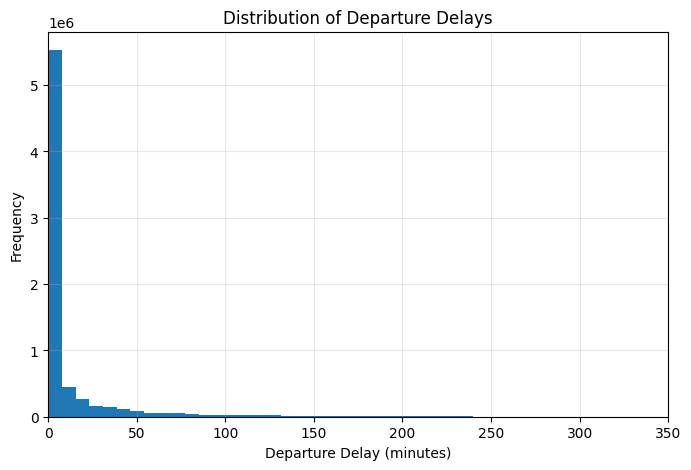

In [ ]:
# Plot distribution as a smooth density line
plt.figure(figsize=(8,5))
df['DEP_DELAY_NEW'].plot(kind='hist',bins=350)
plt.title("Distribution of Departure Delays")
plt.xlabel("Departure Delay (minutes)")
# plt.ylabel("Density")
plt.xlim(0,350)

plt.grid(alpha=0.3)
plt.show()

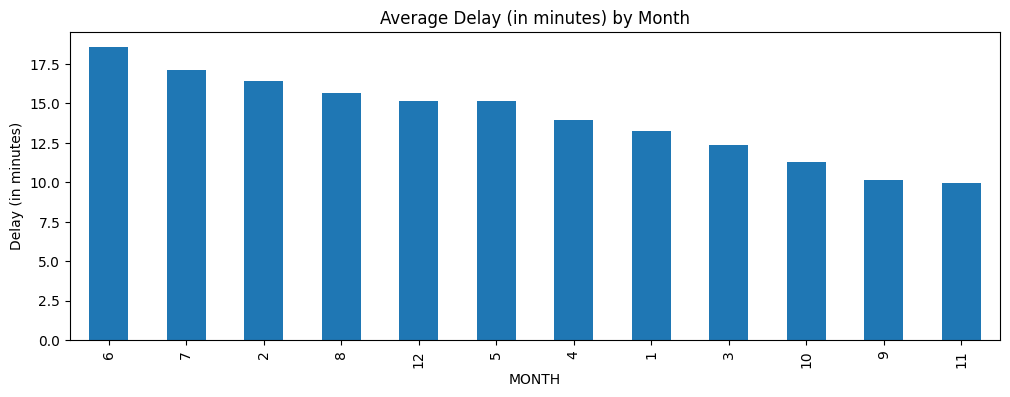

In [ ]:
# What is the delay rate by month?
month_delay = (df.groupby('MONTH')['DEP_DELAY_NEW']
                   .mean()
                   .sort_values(ascending=False))

month_delay.plot(kind='bar', figsize=(12,4))
plt.title("Average Delay (in minutes) by Month")
plt.ylabel("Delay (in minutes)")
plt.show()

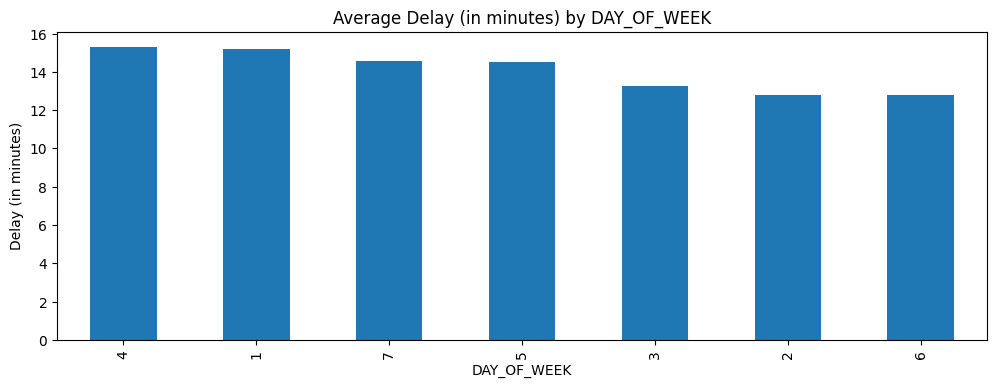

In [ ]:
# What is the delay rate by day of week?
month_delay = (df.groupby('DAY_OF_WEEK')['DEP_DELAY_NEW']
                   .mean()
                   .sort_values(ascending=False))

month_delay.plot(kind='bar', figsize=(12,4))
plt.title("Average Delay (in minutes) by DAY_OF_WEEK")
plt.ylabel("Delay (in minutes)")
plt.show()

In [ ]:
df['CARRIER_DELAY'].describe()

,CARRIER_DELAY
count,7.422037e+06
mean,3.954839e+00
std,2.976341e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.695000e+03


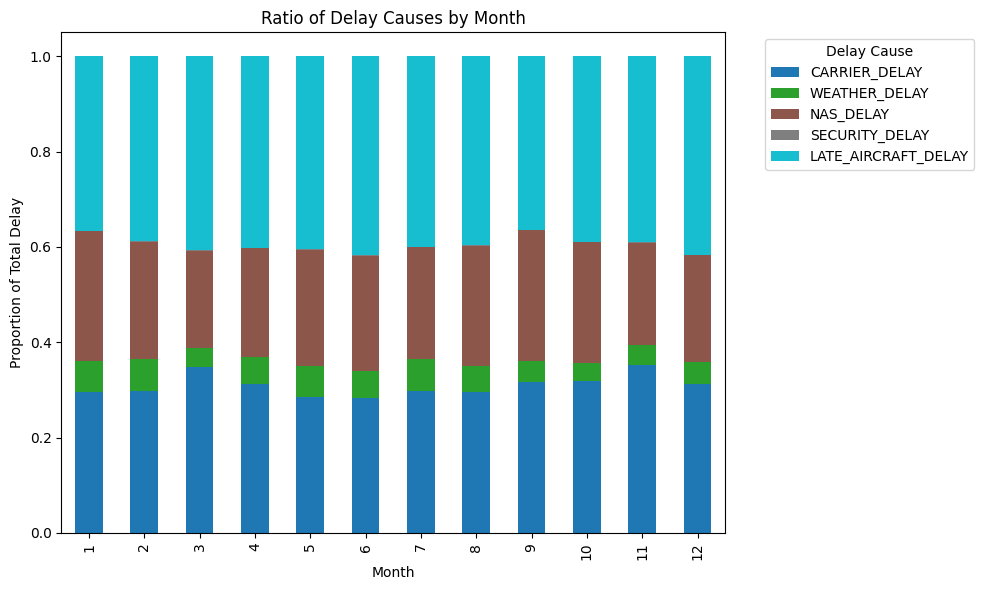

In [ ]:

delay_cols = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

# Replace NaNs with 0 for delay cause columns
df[delay_cols] = df[delay_cols].fillna(0)

# Group by month and sum all delay minutes by cause
monthly_delays = df.groupby('MONTH')[delay_cols].sum()

# Compute ratio of each cause relative to total delay that month
monthly_ratios = monthly_delays.div(monthly_delays.sum(axis=1), axis=0)

# Plot stacked bar chart (distribution of causes by month)
monthly_ratios.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab10')

plt.title("Ratio of Delay Causes by Month")
plt.xlabel("Month")
plt.ylabel("Proportion of Total Delay")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

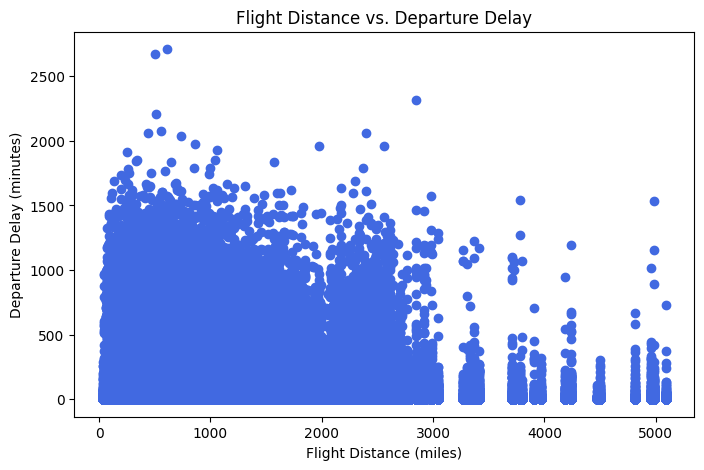

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['DISTANCE'], df['DEP_DELAY_NEW'], color='royalblue')

plt.title("Flight Distance vs. Departure Delay")
plt.xlabel("Flight Distance (miles)")
plt.ylabel("Departure Delay (minutes)")
plt.show()

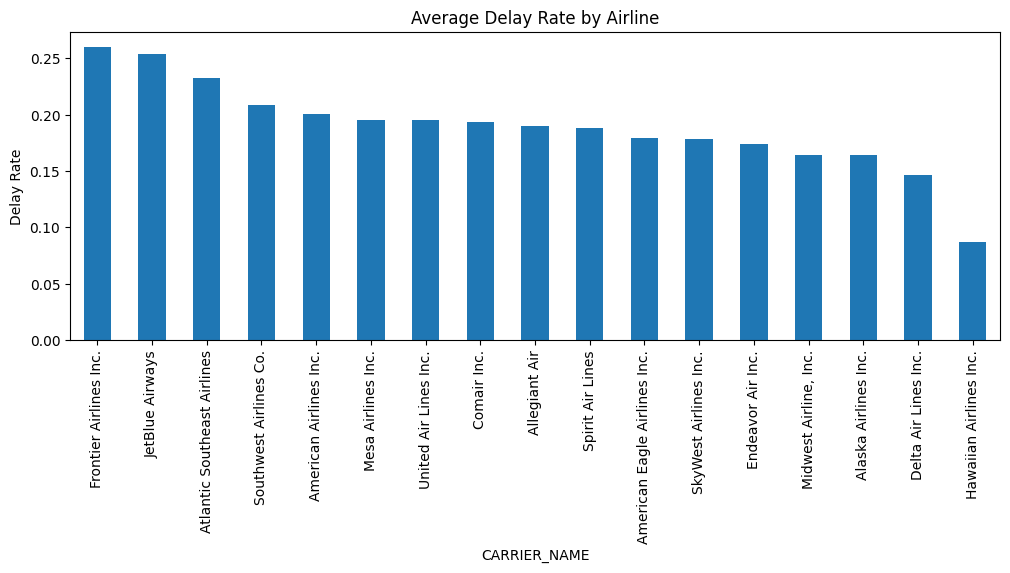

In [ ]:
# What is the delay rate by airline?
carrier_delay = (df.groupby('CARRIER_NAME')['DEP_DEL15']
                   .mean()
                   .sort_values(ascending=False))

carrier_delay.plot(kind='bar', figsize=(12,4))
plt.title("Average Delay Rate by Airline")
plt.ylabel("Delay Rate")
plt.show()

Takeaways: Values of delay rate per airline tend to range 0.1 to 0.25, with most being from frontier

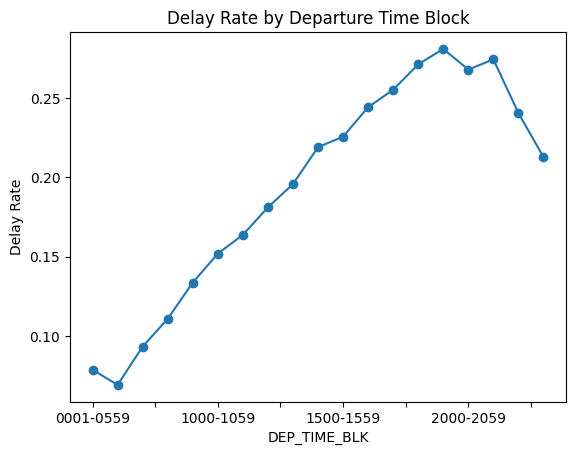

In [ ]:
time_delay = (df.groupby('DEP_TIME_BLK')['DEP_DEL15']
                .mean()
                .sort_index())

time_delay.plot(kind='line', marker='o')
plt.title("Delay Rate by Departure Time Block")
plt.ylabel("Delay Rate")
plt.show()

Illustrates how flights later in the day usually delay more. This is likely due to propogated delays

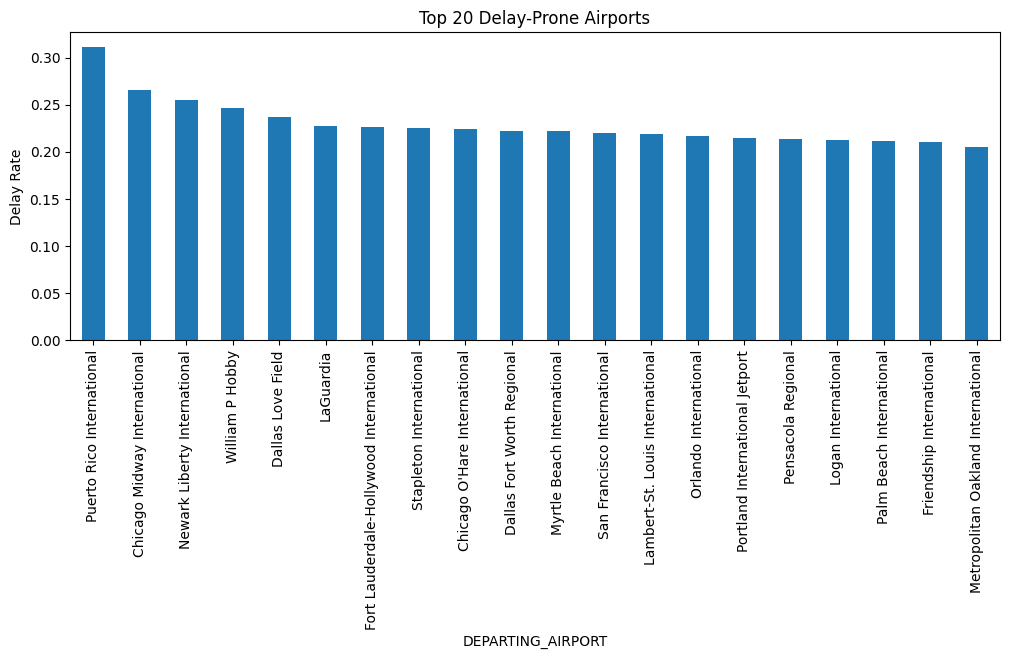

In [ ]:
airport_delay = (df.groupby('DEPARTING_AIRPORT')['DEP_DEL15']
                   .mean()
                   .sort_values(ascending=False)
                   .head(20))

airport_delay.plot(kind='bar', figsize=(12,4))
plt.title("Top 20 Delay-Prone Airports")
plt.ylabel("Delay Rate")
plt.show()

Distribution of delay rate by airport looks pretty uniform tbh

In [ ]:
# What are the numerical correlations with the target variable

num_cols = df.select_dtypes(include=['float64','int64']).columns
corr = df[num_cols].corr()['DEP_DEL15'].sort_values(ascending=False)
print(corr)

DEP_DEL15                        1.000000
DEP_BLOCK_HIST                   0.198331
CARRIER_HISTORICAL               0.121155
SEGMENT_NUMBER                   0.117343
DEP_AIRPORT_HIST                 0.099611
DAY_HISTORICAL                   0.097732
PRCP                             0.080107
AWND                             0.050869
SNOW                             0.050233
LONGITUDE                        0.027445
AIRPORT_FLIGHTS_MONTH            0.026883
SNWD                             0.026275
AVG_MONTHLY_PASS_AIRPORT         0.024386
DISTANCE_GROUP                   0.015998
AIRLINE_AIRPORT_FLIGHTS_MONTH    0.013950
NUMBER_OF_SEATS                  0.011734
CONCURRENT_FLIGHTS               0.009380
PLANE_AGE                        0.006335
AIRLINE_FLIGHTS_MONTH            0.003401
AVG_MONTHLY_PASS_AIRLINE         0.001158
LATITUDE                         0.000140
DAY_OF_WEEK                     -0.000030
FLT_ATTENDANTS_PER_PASS         -0.002286
TMAX                            -0

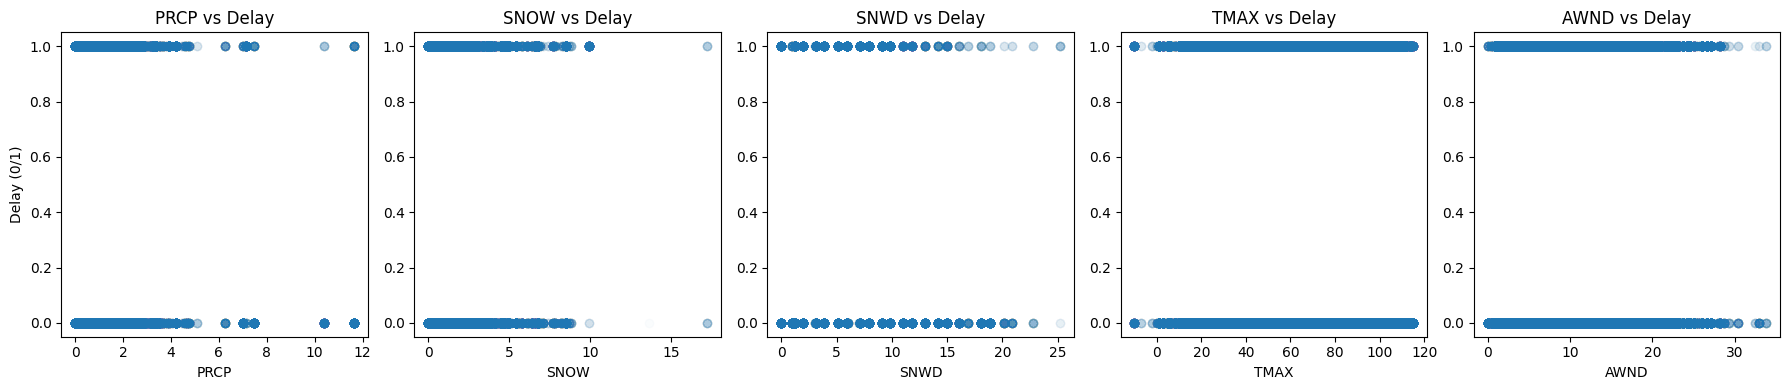

In [ ]:
# Weather Analysis
weather_variables = ["PRCP", "SNOW", "SNWD", "TMAX", "AWND"]
plt.figure(figsize=(18, 4))
for i, var in enumerate(weather_variables, 1):
    plt.subplot(1, len(weather_variables), i)
    plt.scatter(df[var], df['DEP_DEL15'], alpha=0.02)
    plt.title(f"{var} vs Delay")
    plt.xlabel(var)
    if i == 1:
        plt.ylabel("Delay (0/1)")
    else:
        plt.ylabel("")
plt.tight_layout()
plt.show()

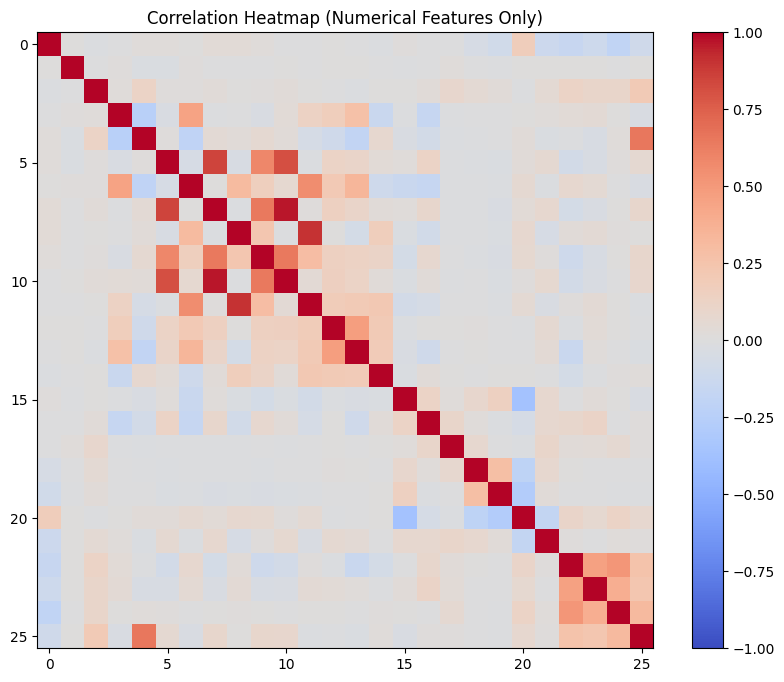

In [ ]:
# Multicollinarity Checks
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

In [ ]:
# but what are the top colinear relationships in the dataset?
num_cols = df.select_dtypes(include=['float64','int64']).columns
corr = df[num_cols].corr()
corr_pairs = corr.unstack().reset_index()
corr_pairs.columns = ['feature_1', 'feature_2', 'corr']
corr_pairs = corr_pairs[corr_pairs['feature_1'] < corr_pairs['feature_2']]
corr_pairs = corr_pairs.reindex(corr_pairs['corr'].abs().sort_values(ascending=False).index)
#parameter n
top_n = 5
corr_pairs.head(top_n)

,feature_1,feature_2,corr
192,AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,0.967890
219,AIRLINE_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRLINE,0.902794
187,AIRPORT_FLIGHTS_MONTH,CONCURRENT_FLIGHTS,0.848995
265,AVG_MONTHLY_PASS_AIRPORT,CONCURRENT_FLIGHTS,0.808633
654,DEP_BLOCK_HIST,SEGMENT_NUMBER,0.649590


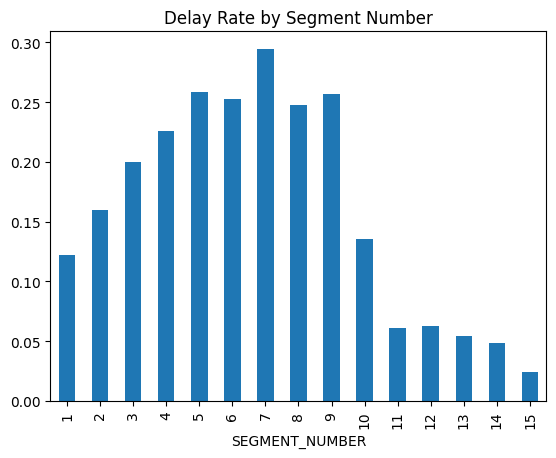

In [ ]:
delay_chain = df.groupby('SEGMENT_NUMBER')['DEP_DEL15'].mean()
delay_chain.plot(kind='bar', title="Delay Rate by Segment Number")
plt.show()
# curve in the delay rate, lots of delays mid day?

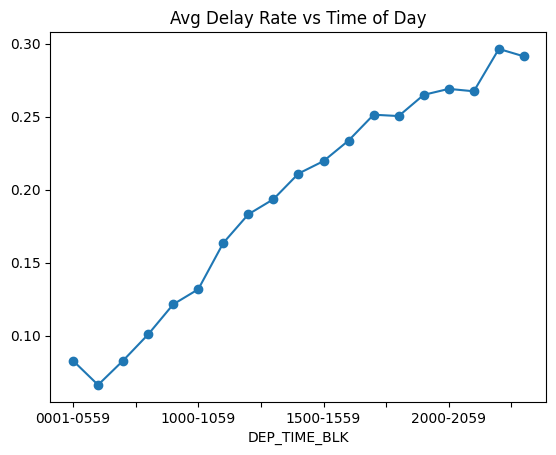

In [ ]:
pivot = df.pivot_table(values='DEP_DEL15',
                       index='DEP_TIME_BLK',
                       columns='DEPARTING_AIRPORT',
                       aggfunc='mean')
pivot.mean(axis=1).plot(marker='o', title="Avg Delay Rate vs Time of Day")
plt.show()

In [ ]:
# Airport clustering w/ kmeans?
from sklearn.cluster import KMeans

coords = df[['LATITUDE', 'LONGITUDE']]
kmeans = KMeans(n_clusters=6, random_state=42).fit(coords)
df['REGION_CLUSTER'] = kmeans.labels_

In [ ]:
df.groupby('REGION_CLUSTER')['DEP_DEL15'].mean().sort_values()

,DEP_DEL15
REGION_CLUSTER,
2,0.098264
1,0.176904
0,0.187110
5,0.190812
4,0.198425
3,0.205632


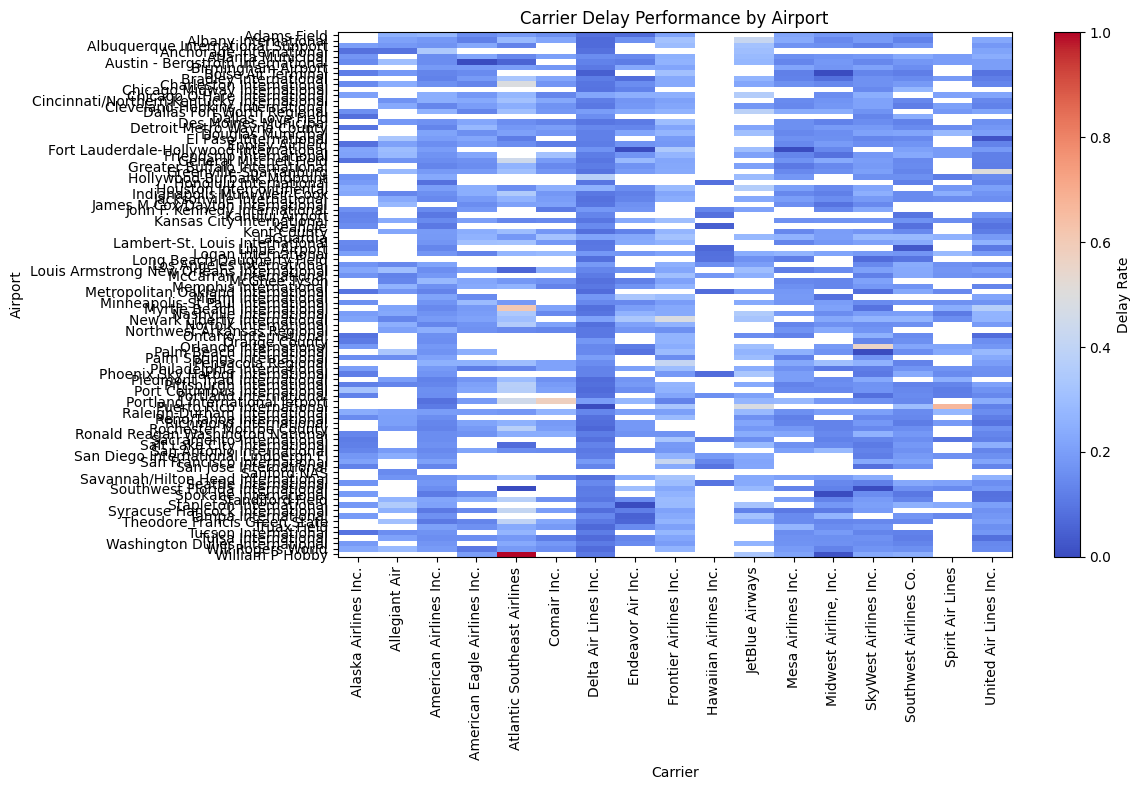

In [ ]:
# Airport Carrier Matrix
m = df.pivot_table(values='DEP_DEL15',
                   index='DEPARTING_AIRPORT',
                   columns='CARRIER_NAME',
                   aggfunc='mean')

plt.figure(figsize=(12, 8))
plt.imshow(m, aspect='auto', cmap='coolwarm')
plt.colorbar(label="Delay Rate")
plt.title("Carrier Delay Performance by Airport")

plt.xticks(ticks=range(len(m.columns)), labels=m.columns, rotation=90)
plt.yticks(ticks=range(len(m.index)), labels=m.index)

plt.xlabel("Carrier")
plt.ylabel("Airport")

plt.tight_layout()
plt.show()